[*] Drug administered at step 28 (Rapamycin)


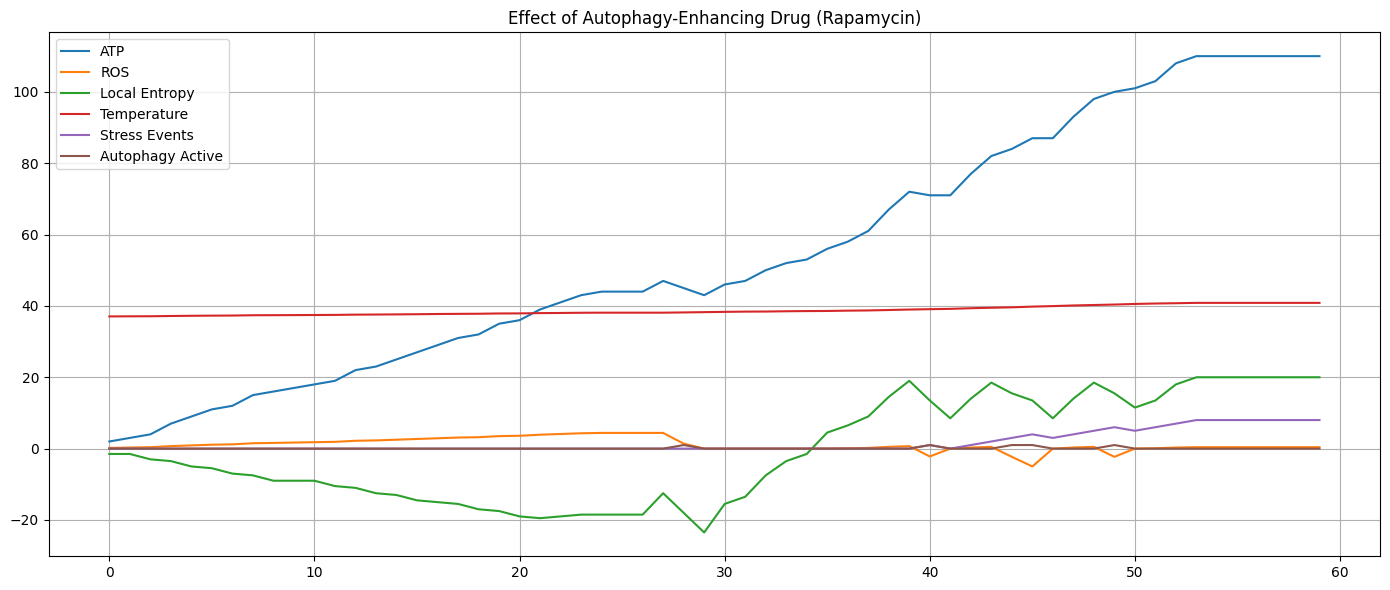

Apoptosis Triggered: True
Autophagy was activated: True
Drug administered: True


In [ ]:
import matplotlib.pyplot as plt
import random

class Mitochondrion:
    def __init__(self):
        self.proton_gradient = 0
        self.atp = 0
        self.entropy_local = 0
        self.entropy_global = 0
        self.heat_loss = 0
        self.temperature = 37.0
        self.stress_events = 0
        self.ros = 0
        self.apoptosis_triggered = False
        self.glycolysis_mode = False
        self.energy_deficit_counter = 0
        self.autophagy_active = False
        self.autophagy_energy_reserve = 0
        self.drug_administered = False

    def pump_protons(self, energy_input, oxygen_available):
        if not oxygen_available:
            self.energy_deficit_counter += 1
            return
        protons = energy_input // 2
        self.proton_gradient += protons
        self.entropy_local -= protons * 0.5
        self.entropy_global += protons * 0.2

    def synthesize_atp(self):
        while self.proton_gradient >= 3:
            self.proton_gradient -= 3
            self.atp += 1
            self.entropy_local += 1
            self.entropy_global += 1.5
            self.heat_loss += 0.5
            self.ros += 0.1

    def leak_protons(self):
        if self.proton_gradient > 15:
            leaked = int(self.proton_gradient * 0.2)
            self.proton_gradient -= leaked
            self.entropy_local += leaked * 0.6
            self.entropy_global += leaked * 1.2
            self.ros += 0.2 * leaked / 10

    def regulate_temperature(self):
        self.temperature = 37.0 + (self.heat_loss * 0.05)
        if self.temperature > 39.0 or self.ros > 5:
            self.stress_events += 1

    def gomeostasis_control(self):
        if self.entropy_local < -20:
            self.entropy_local += 2
            self.entropy_global += 2
        elif self.entropy_local > 20:
            self.entropy_local -= 2

    def switch_to_glycolysis(self):
        if self.energy_deficit_counter >= 3:
            self.glycolysis_mode = True

    def glycolysis_step(self, energy_input):
        if not self.glycolysis_mode:
            return
        produced = energy_input // 5
        self.atp += produced
        self.entropy_local += energy_input * 0.4
        self.entropy_global += energy_input * 0.6
        self.heat_loss += energy_input * 0.1

    def check_autophagy_trigger(self):
        ros_threshold = 3 if self.drug_administered else 6
        entropy_threshold = 20 if self.drug_administered else 25
        if self.ros > ros_threshold or self.entropy_local > entropy_threshold:
            self.autophagy_active = True
            self.autophagy_energy_reserve = 0

    def autophagy_step(self):
        if not self.autophagy_active:
            return
        if self.atp >= 3:
            self.atp -= 3
            multiplier = 1.5 if self.drug_administered else 1.0
            self.entropy_local -= 5 * multiplier
            self.ros -= 2 * multiplier
            self.heat_loss += 1
            self.entropy_global += 3
            self.autophagy_energy_reserve += 1
        if self.autophagy_energy_reserve >= (2 if self.drug_administered else 3):
            self.autophagy_active = False
            self.energy_deficit_counter = 0
            self.stress_events = max(0, self.stress_events - 2)
            self.ros = max(0, self.ros)

    def apoptosis_check(self):
        if self.stress_events > 7 or self.ros > 10:
            self.apoptosis_triggered = True

    def tick(self, energy_input, oxygen_available=True):
        if self.apoptosis_triggered:
            return
        self.pump_protons(energy_input, oxygen_available)
        self.synthesize_atp()
        self.leak_protons()
        self.regulate_temperature()
        self.gomeostasis_control()
        self.switch_to_glycolysis()
        self.glycolysis_step(energy_input)
        self.check_autophagy_trigger()
        self.autophagy_step()
        self.apoptosis_check()

    def status(self):
        return {
            "ATP": self.atp,
            "ROS": round(self.ros, 2),
            "Temp": round(self.temperature, 2),
            "Entropy Local": round(self.entropy_local, 2),
            "Entropy Global": round(self.entropy_global, 2),
            "Glycolysis": self.glycolysis_mode,
            "Autophagy": self.autophagy_active,
            "Stress": self.stress_events,
            "Apoptosis": self.apoptosis_triggered
        }

# Run simulation 
mito = Mitochondrion()
log = []

for step in range(60):
    energy = random.choice([5, 10, 15])
    oxygen = not (25 <= step <= 35)  # hypoxia between steps 25-35
    if step == 28:
        mito.drug_administered = True
        print(f"[*] Drug administered at step {step} (Rapamycin)")

    mito.tick(energy, oxygen_available=oxygen)
    log.append(mito.status())

# Plotting 
def plot_metric(metric, label):
    plt.plot([x[metric] for x in log], label=label)

plt.figure(figsize=(14, 6))
plot_metric("ATP", "ATP")
plot_metric("ROS", "ROS")
plot_metric("Entropy Local", "Local Entropy")
plot_metric("Temp", "Temperature")
plot_metric("Stress", "Stress Events")
plot_metric("Autophagy", "Autophagy Active")
plt.title("Effect of Autophagy-Enhancing Drug (Rapamycin)")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print("Apoptosis Triggered:", mito.apoptosis_triggered)
print("Autophagy was activated:", any(x["Autophagy"] for x in log))
print("Drug administered:", mito.drug_administered)


### Interpretation:

1. ATP (blue line)
Steady increase in ATP until it plateaus near the end.

Indicates that the mitochondria are actively synthesizing energy.

The plateau may reflect maxed-out capacity or limited substrate/gradient.

2. ROS (orange line)
Gradual rise early on, indicating growing oxidative stress.

Sharp drop near step 28–30, that’s when you activated the drug (Rapamycin).

Suggests that autophagy was triggered successfully, and ROS was cleared.

3. Local Entropy (green line)
Initially decreasing due to the ordering effect of ATP production and low stress.

Starts rising around step 30, as more energy accumulates and byproducts are produced.

Fluctuates: this is typical of a living system managing entropy dynamically via feedback (autophagy).

4. Temperature (red line)
Slow but steady increase: reflects heat loss from ATP production and ROS generation.

As expected, global entropy is rising, even as local entropy is managed.

5. Stress Events (purple line)
Low at first.

Begins accumulating post-hypoxia (step 25–35), showing that stress is being detected.

Continues to rise modestly, but not enough to trigger apoptosis, likely because autophagy reduced ROS in time.

6. Autophagy Active (brown/orange flat line at 0/1)
Activates right after ROS peaks (just before step 30).

Stays active briefly (a few steps), then turns off.

Shows autophagy did its job and was deactivated after cleanup; behavior enhanced by Rapamycin.

7. Drug Effect (Rapamycin)
Introduced at step 28.

Resulted in earlier and more efficient activation of autophagy:

Quicker ROS reduction,

Limited rise in stress events,

Controlled local entropy.

Without the drug, autophagy would have activated later, and ROS/stress might have reached the apoptosis threshold.

This system mimics real cellular behavior:

- Entropy is constantly increasing, but the cell uses energy to locally reduce it.

- Autophagy is a strategy for reorganizing internal disorder, not eliminating entropy.

- Death (apoptosis) is avoided if the system acts in time, and enhancing autophagy pharmacologically can tip the balance.

This is how life negotiates with entropy, not by defeating it, but by managing it smartly.